In [1]:
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

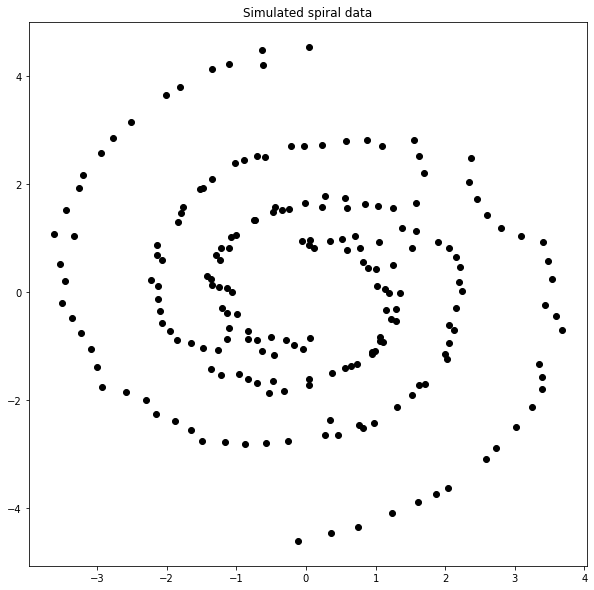

In [3]:
tetha = np.linspace(0, 3, 100)
a = 1
b = 0.5 	 
r = a*np.exp(b*tetha)

# X(+1) members of first group, centering in (c1p,c2p)
c1p = 0
c2p = 0
X1p = c1p + r*np.cos(tetha*np.pi)
X2p = c2p + r*np.sin(tetha*np.pi)

# X(-1) members of second group, centering in (c1n,c2n)
c1n = 1
c2n = 0
X1n = 1 - (c1n + r*np.cos(tetha*np.pi))
X2n = - (c2n + r*np.sin(tetha*np.pi))

# Agregating data
X1 = np.hstack((X1p, X1n))
X2 = np.hstack((X2p, X2n))

# generating indicator variable
yp = [1] * 100
yn = [-1] * 100
Y  = yp + yn

# Generating noise, N(0,0.01)
e  = np.random.normal(loc = 0, scale = 0.1, size = 200)
X1 = X1 + e
X2 = X2 + e

Spiral_noise = np.vstack((X2, X1))

# clusters for generated spiral data
sc = SpectralClustering(n_clusters=4, eigen_solver="arpack", affinity = "rbf").fit(Spiral_noise.T)


fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(Spiral_noise[0], Spiral_noise[1], c = "black")
plt.title("Simulated spiral data")
plt.show()

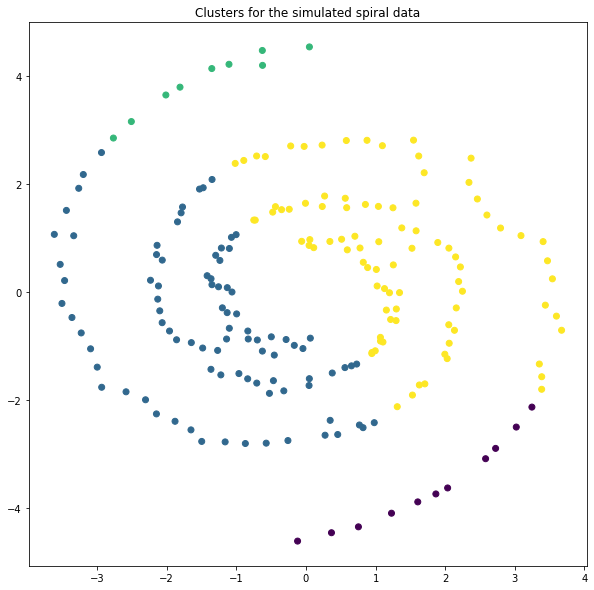

In [4]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(Spiral_noise[0], Spiral_noise[1], c = sc.labels_)
plt.title("Clusters for the simulated spiral data")
plt.show()